## Comparativo Anual de Receitas e Despesas
---
Analisar a evolução das receitas e despesas ao longo dos anos disponíveis no arquivo de orçamento, permitindo uma visão clara da saúde financeira da empresa.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('orcamento.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Tabela ordenada pelo ano e mês

In [ ]:
receitas_despesas = df[(df['Nome conta 1º nível'] == 'Receita')].sort_values(by=['Ano', 'nº mês'], ascending=True)
receitas_despesas

NameError: name 'pd' is not defined

### Total Receitas Janeiro/Fevereiro

In [24]:
receitas_df = df[
    (df['Nome conta 1º nível'] == 'Receita') &
    (df['nº mês'].isin([1, 2]))
]
total_receitas_jan_fev_por_ano = receitas_df.groupby('Ano')['Realizado'].sum()
total_jan_fev_2022 = total_receitas_jan_fev_por_ano.get(2022, 0)
total__jan_fev_2023 = total_receitas_jan_fev_por_ano.get(2023, 0)

# Exibindo os resultados formatados
print(f"Total de Receitas em 2022: R$ {total_jan_fev_2022:,.2f}")
print(f"Total de Receitas em 2023: R$ {total__jan_fev_2023:,.2f}")

Total de Receitas em 2022: R$ 4,906,767.25
Total de Receitas em 2023: R$ 3,648,954.53


### Receitas Janeiro e Fevereiro 2022 (separadas)

In [32]:
jan_fev_22_df = df[
    (df['Ano'] == 2022) &
    (df['Nome conta 1º nível'] == 'Receita') &
    (df['nº mês'].isin([1, 2]))
]

total_jan_fev_22 = jan_fev_22_df.groupby('Mês')['Realizado'].sum()
jan_22 = total_jan_fev_22.get('JANEIRO', 0)
fev_22 = total_jan_fev_22.get('FEVEREIRO', 0)
print(f"Total de Receitas em janeiro 2022: R$ {jan_22:,.2f}")
print(f"Total de Receitas em fevereiro 2022: R$ {fev_22:,.2f}")


Total de Receitas em janeiro 2022: R$ 2,592,824.08
Total de Receitas em fevereiro 2022: R$ 2,313,943.17


### Receitas Janeiro e Fevereiro 2023 (separadas)

In [33]:
jan_fev_23_df = df[
    (df['Ano'] == 2023) &
    (df['Nome conta 1º nível'] == 'Receita') &
    (df['nº mês'].isin([1, 2]))
]

total_jan_fev_23 = jan_fev_23_df.groupby('Mês')['Realizado'].sum()
jan_23 = total_jan_fev_23.get('JANEIRO', 0)
fev_23 = total_jan_fev_23.get('FEVEREIRO', 0)
print(f"Total de Receitas em janeiro 2023: R$ {jan_23:,.2f}")
print(f"Total de Receitas em fevereiro 2023: R$ {fev_23:,.2f}")


Total de Receitas em janeiro 2023: R$ 1,514,305.95
Total de Receitas em fevereiro 2023: R$ 2,134,648.58


### Tabela comparativa de receitas de janeiro e fevereiro de 2022 e 2023

In [42]:
receitas_jan_fev_22_23 = df[
    (df['Nome conta 1º nível'] == 'Receita') &
    (df['nº mês'].isin([1, 2])) &
    (df['Ano'].isin([2022, 2023]))
]

# --- 2. AGRUPAR E SOMAR ---
# Agrupamos por Ano e Mês para ter a soma de cada mês em cada ano
soma_agrupada = receitas_jan_fev_22_23.groupby(['Ano', 'Mês'])['Realizado'].sum()
dados_para_grafico = soma_agrupada.unstack('Ano').sort_values(by="Mês", ascending=False)
dados_para_grafico

Ano,2022,2023
Mês,,
JANEIRO,2592824.08,1514305.95
FEVEREIRO,2313943.17,2134648.58


#### Gera o gráfico

Gráfico 'comparativo_receitas_jan_fev_22_23.png' foi gerado com sucesso.


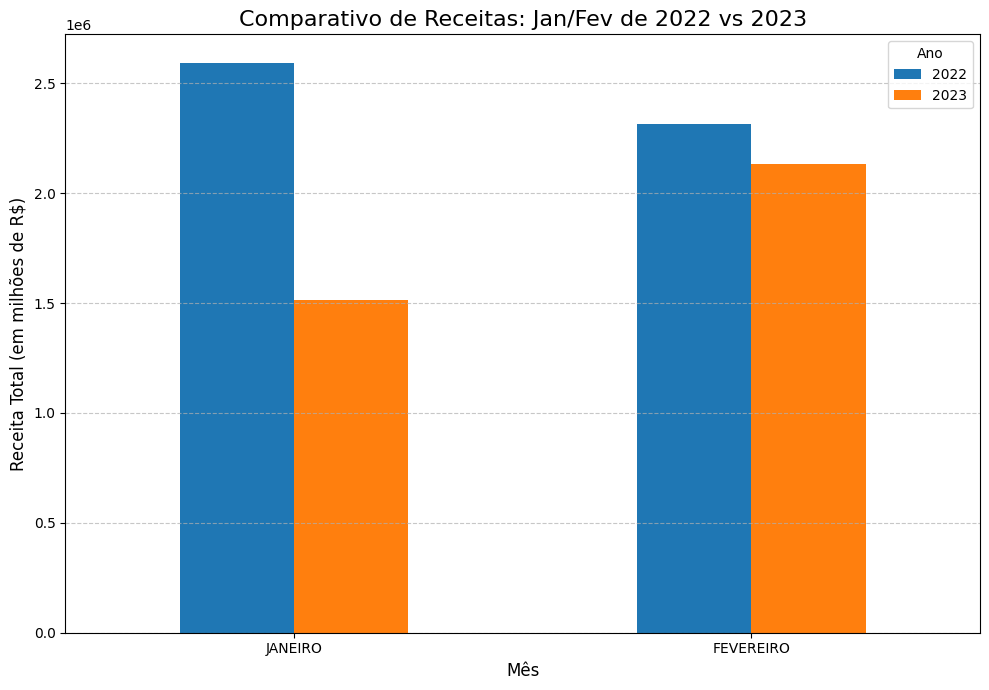

In [45]:
dados_para_grafico.plot(kind='bar', figsize=(10, 7))

# --- 5. MELHORAR A APARÊNCIA (Toque de Consultor) ---
plt.title('Comparativo de Receitas: Jan/Fev de 2022 vs 2023', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Receita Total (em milhões de R$)', fontsize=12)
plt.xticks(rotation=0) # Rótulos do eixo X na horizontal
plt.legend(title='Ano') # Adiciona um título à legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvamos o gráfico em um arquivo
plt.savefig('graficos/comparativo_receitas_jan_fev_22_23.png')
print("Gráfico 'comparativo_receitas_jan_fev_22_23.png' foi gerado com sucesso.")

### Exibe tabela referente ao ano de 2023 (Janeiro e Fevereiro)

In [ ]:
receita_jan_fev_2023 = df[(df['Ano'] == 2023) & (df['Cod conta 1º nível'] == 2)].sort_values(by=['Ano', 'nº mês'], ascending=True)
receita_jan_fev_2023

### Visualizar tudo

In [ ]:

df